# Workbook 5: Fixed and random effects model
This week we will be reviewing a set of models that account for grouping. The discussion on panel analysis are from Multilevel and Longitudinal Modeling Using Stata by Sophia Rabe-Hesketh and Anders Skrondal. The discussion on panel analysis is also from Fixed Effects Models and Fixed Effects Models Using Categorical Outcomes, both written by Paul Allison.

# Grouping analysis: examining units over time or groups

<b>Fixed and random effect models</b> is a set of models that control for clusters within data. Clusters can be anything that is grouping observations together. Many times in academia, we refer things by different names. For example, if I am working with clusters of geography (like census tracts within counties), I will call it the random intercept model in mutlilevel modeling instead of random effects model. Another example, if I am working with panel data, I will call it random effects models. 

Let's think through some common clusters...

<b>cross-sectional, three levels of groups</b>

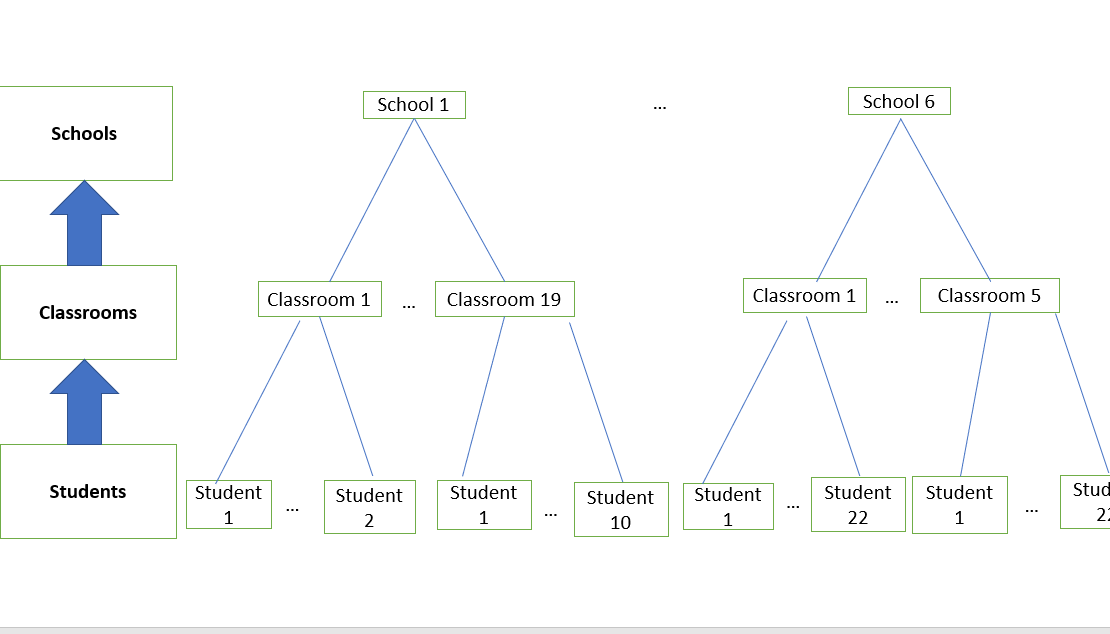

<b>cross-sectional, three levels of groups</b>

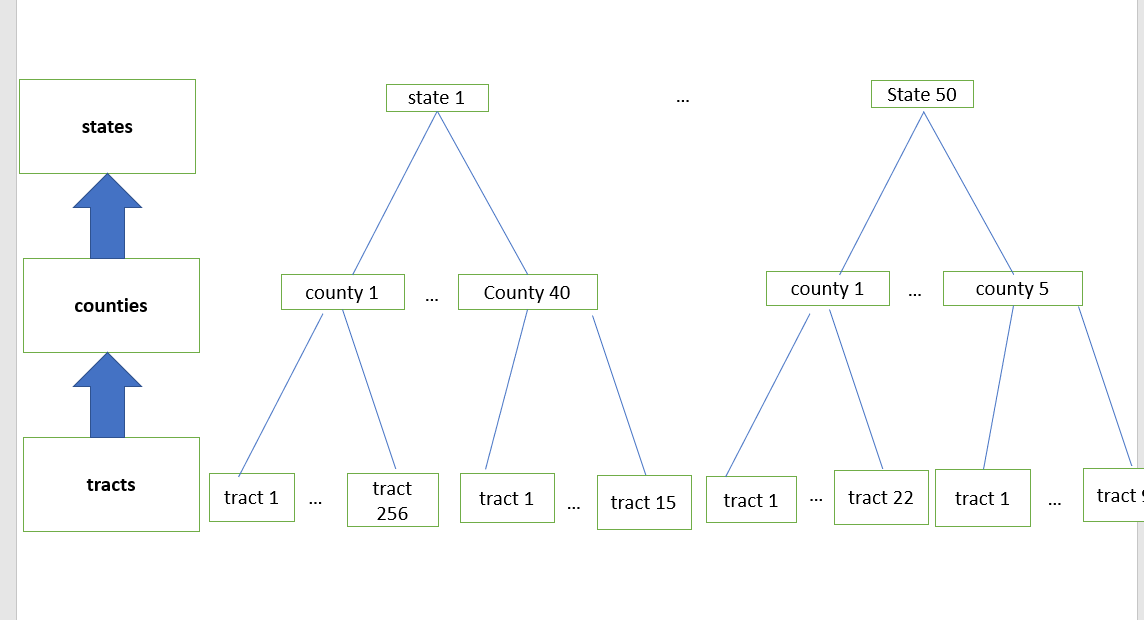

<b>panel, notice that time is nested with each person</b>

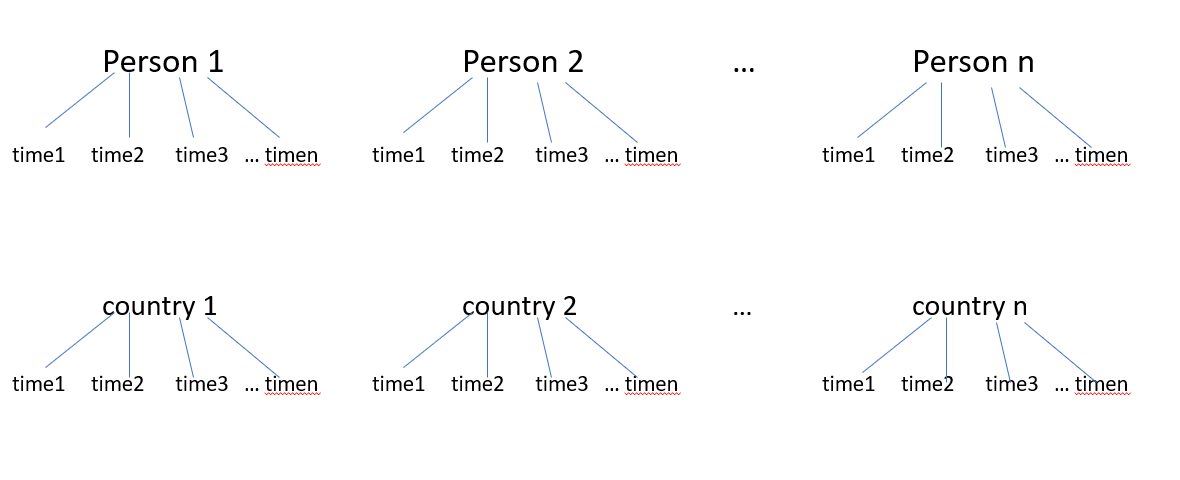

## The Data is Stata
<b> This is how grouped level data looks like in Stata:</b>

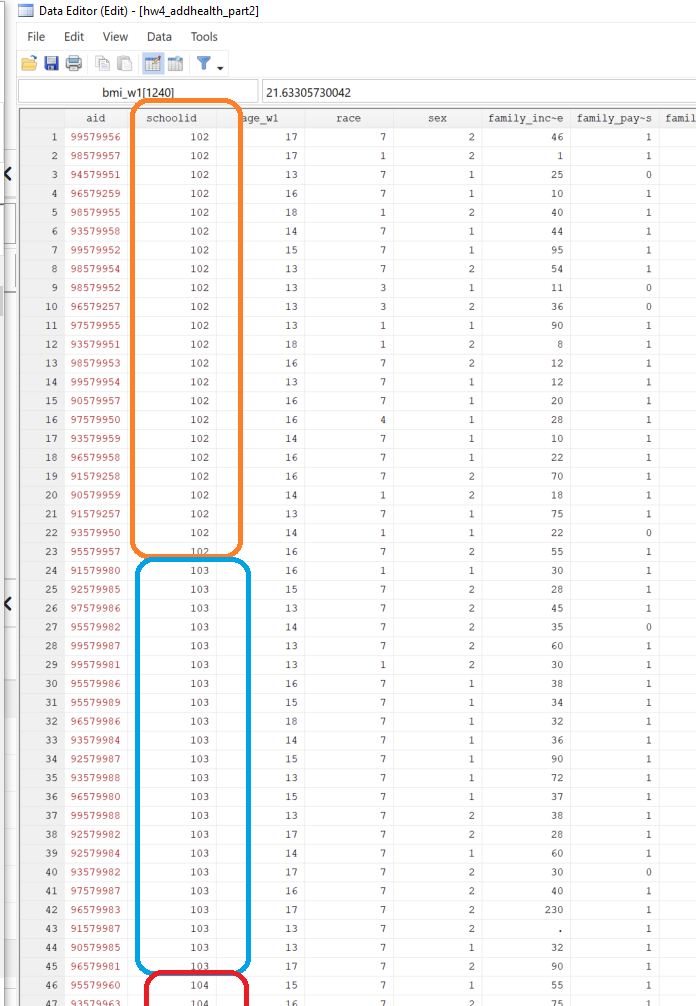

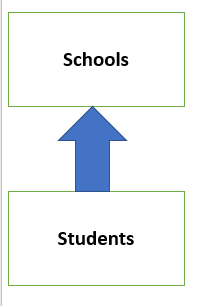

This is an example of panel data.

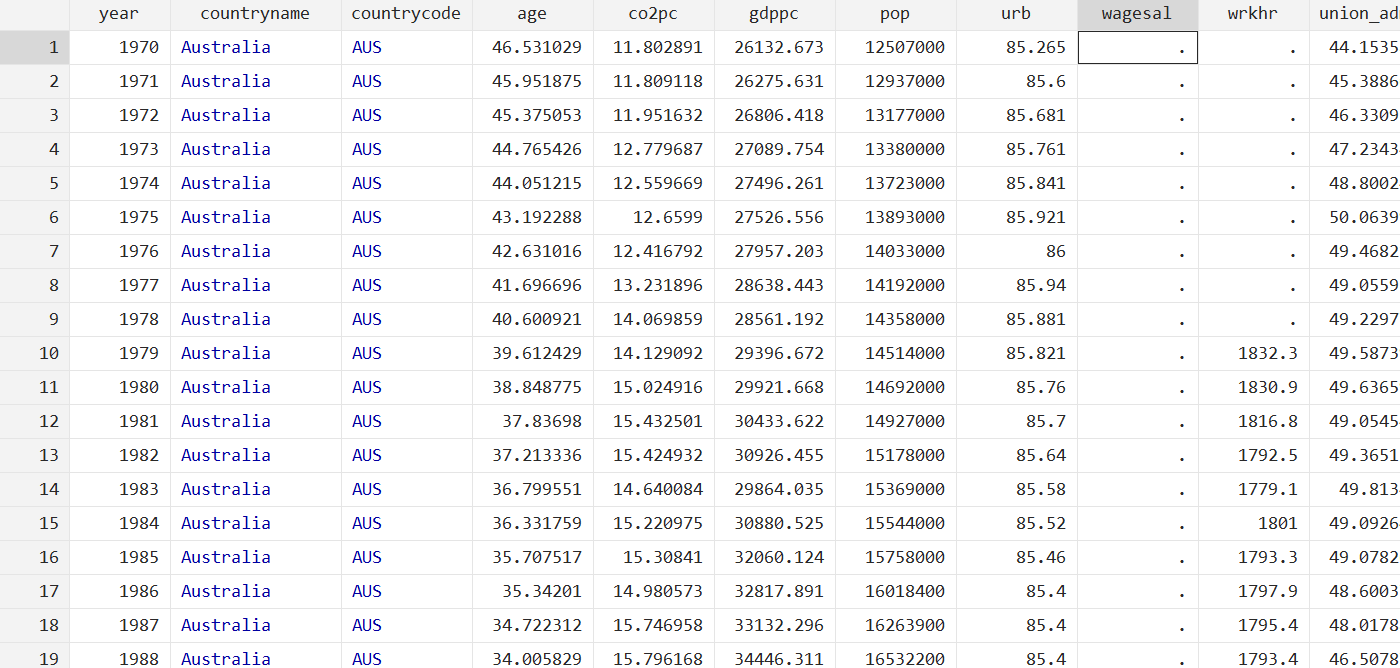

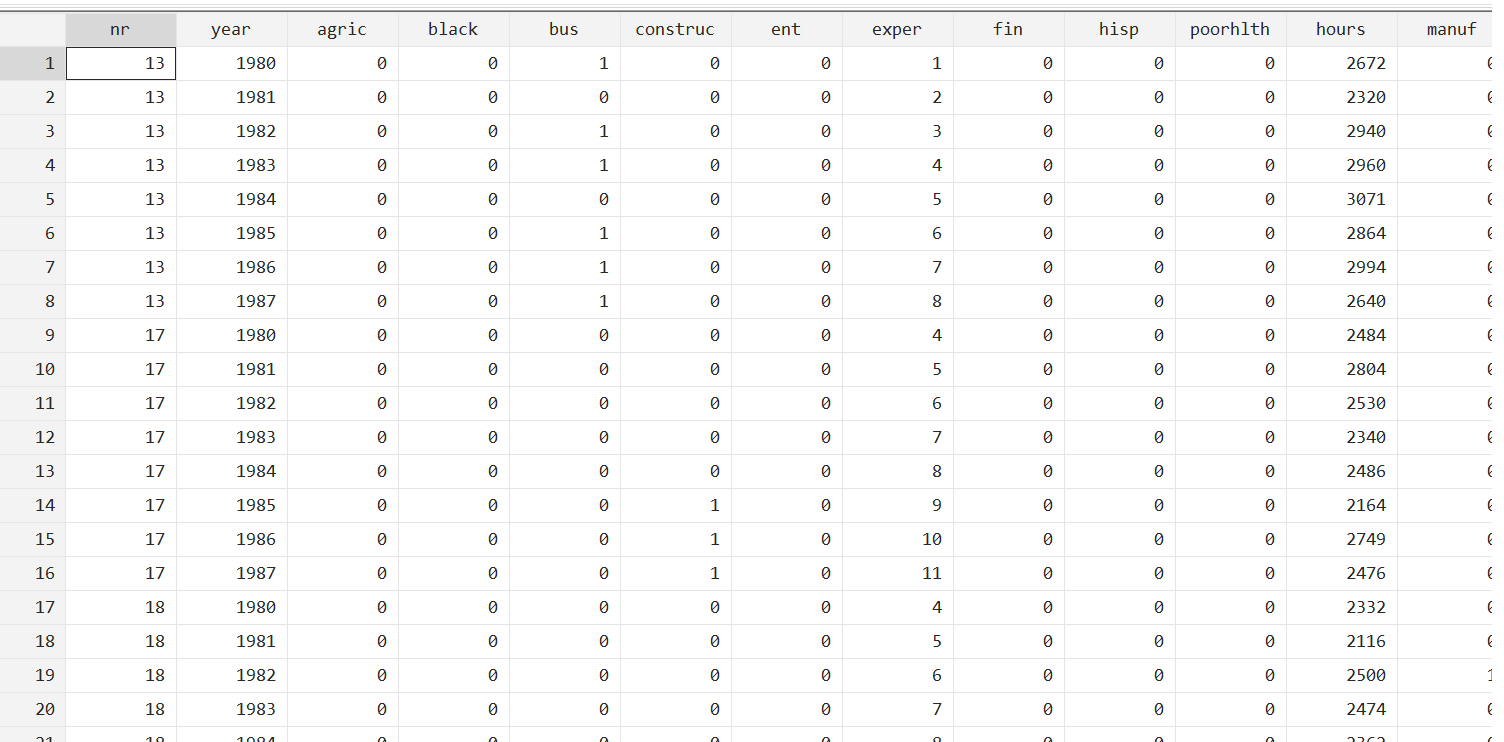

## Types of models we will review today

This workbook will focus on the following models:
* Random effects model
* Between effects model
* Fixed effects model

In social sciences, a lot of the data we are looking at is not completely independent. Using these models can help us control for some of the dependency for time or groups.

* I want to examine test scores. Test scores may be correlated at the school level
* I want to examine air pollution. Air pollution may be correlated at the geographical level
* I want to examine carbon dioxide emission around the world. CO2 emissions may be correlated at the country level

Within panel data, we have two types variables:
* temporal variables which are variables that change over time.
* non-temporal variables which are variables that DON'T change over time.

### Random effects model
The random effects model (also sometimes referred to as a random intercept model in multilevel models) is there are j clusters with i units. The random effects model controls for j clustering by giving every j cluster it's own intercept. The random effects model examines all i and j observations in the data while controling for j clusters.

So for example, we can derive the random effects model by doing the following. First we have the data represented as a traditional regression model:

<center>$y_{ij}=\beta_0+\beta_1*x_{1ij}+...+\beta_p*x_{pij}+\xi_{pij}$
    
where $y_{ij}$ is the outcome at ij observation

$\beta_0$ is intercept

$\beta_1 ... \beta_p$ is the coefficient for $x_{2ij} ... x_{pij}$
    
$x_{1ij} ... x_{pij}$ are the covariates/independent variables
    
$\xi_{pij}$ is the residual error term (this greek letter is pronouced like "sky" but with a z)

<b>But we need to do some sort of controlling here for the j clusters

Given that i is clustered within j, we can substitute: $\xi_{ij}=\zeta_j + \epsilon_{ij}$

where $\zeta_j$ is difference between the overall population mean and j-cluster specific mean 

$\epsilon_{ij}$ is the residual error term for all observations

Now, substituting to the previous equation does...

<center>$y_{ij}=\beta_0+\beta_1*x_{1ij}+...+\beta_p*x_{pij}+(\zeta_j + \epsilon_{ij})$

<center>$y_{ij}=(\beta_0+\zeta_j)+\beta_1*x_{1ij}+...+\beta_p*x_{pij}+ \epsilon_{ij}$
    
where $(\beta_0+\zeta_j)$ is the j cluster-specific intercept


#### Random effects model:

<center>$y_{ij}=(\beta_0+\zeta_j)+\beta_1*x_{1ij}+...+\beta_p*x_{pij}+ \epsilon_{ij}$
    
where $(\beta_0+\zeta_j)$ is the j cluster-specific intercept
    
Assumptions (similar to before): 
    
At the ij level, $E(\epsilon_{ij})=0$ and $Cor(\epsilon_{ij},x_ij)=0$ and $Cor(\epsilon_{ij},\bar{x}_{ij})=0$
    
At the j cluster level, $E(\zeta_{j})=0$ and $Cor(\zeta_{j},x_ij)=0$ and $Cor(\zeta_{j},\bar{x}_{ij})=0$
    
Also, homoskedasticity at both levels:
    
$Var(\epsilon_{ij})=\theta$
    
$Var(\zeta_{j})=\psi$
    
*Independence
    
*Uses MLE and assumes normal distribution for the errors: $\epsilon_{ij}$ and $\zeta_{j}$
    
*More j clusters are needed with the law of large numbers...I saw 30, some say 42 for robust standard errors

### Between effects model
The between effects model is a random-intercept model of the average of the dependent and independent variables of the model. The between-effects model observes only the between-j effects of the independent variables.

<center>$y_{.j}=\beta_0+\beta_1*\bar{x}_{1.j}+...+\beta_p*\bar{x}_{p.j}+\zeta_j + \bar{\epsilon}_{.j}$
    
where $y_{.j}$ is the mean outcome of j cluster

$\bar{x}_{1.j} ... \bar{x}_{p.j}$ is the average of the independent variables or covariates for j-cluster

$\zeta_j + \bar{\epsilon}_{.j}$ has the population mean $E(\zeta_j+\bar{\epsilon}_{.j})=0$ and has heteroskedastic variance $Var(\zeta_t+\bar{\epsilon}_{.j})=\psi+\theta/n_j$
    
<b>The between effects model doesn't have ANY within effects in the model. Any non-temporal variables are part of the intercept.

### Fixed effects model
The fixed effects model (sometimes referred to as "within-effects" model) examines only the effects within each j cluster. You derive the fixed effects model by taking the random effects model and subtracting the between effects model:

<center>$y_{ij}-y_{.j}=\beta_1+\beta_2*(x_{2ij}-\bar{x}_{2.j})+...+\beta_p*(x_{pij}-\bar{x}_{p.j})+\zeta_j+(\epsilon_{ij}-\bar{\epsilon}_{.j})$
    
Then, substitute the random intercept for j-specific clusters ($\beta_1+\zeta_j$) with a fixed intercept $\alpha_j$. We do this by using dummies for each j cluster:
    
<center>$y_{ij}=\beta_2*x_{2ij}+...+\beta_p*x_{pij}+\sum \limits _{k=1} ^{j}d_{k}\alpha_k+\epsilon_{ij}-\bar{\epsilon}_{.j})$
    
<center>$y_{ij}=\beta_2*x_{2ij}+...+\beta_p*x_{pij}+\alpha_j+\epsilon_{ij}-\bar{\epsilon}_{.j})$
    
Fixed effects model:
    
$y_{ij}=\beta_i*x_{2ij}+...+\beta_p*x_{pij}+\alpha_j+\epsilon_{ij}$
    
<b>The fixed effects model centers all independent variables around its own j-cluster mean. $\epsilon_{ij}-\bar{\epsilon}_{.j}$ has the population mean $E(\epsilon_{ij}-\bar{\epsilon}_{.j})=0$ and is heteroskedastic with variance $Var(\epsilon_{ij}-\bar{\epsilon}_{.j})=\theta(1-1/n_j)$.
    
Non-temporal covariates are dropped from the model. 

## Let's practice running these various models in Stata

I am interested to see association of economy on CO2 emissions. I measure the economy is two ways: gross domestic product (GDP) and percent of urban population. 

## World Bank Data
Another popular secondary data is [World Bank's World Development Indicators](https://databank.worldbank.org/source/world-development-indicators). 

### Country
They have countries and aggregates. You usually want countries. Aggregates are country groups like "European counties" or "High income countries"

### Series
This is the type of variables. 

### Time
This is where to pick the years.

For purpose of this assignment, pick all countries. 

Variables: 
* GDP per capita (contstant 2015 US$)
* urban population (% of total population)
* carbon dioxide (CO2) emission (total) excluding LULUCF per capita.

Years:  2010-2023.

Then press "Download options" near the top, right corner. Pick .csv

Again, you have the unzip the files. I have a folder where I unzip all files. Pick the one without metadata.

In [12]:
import delimited "C:\Users\cam\Downloads\P_Data_Extract_From_World_Development_Indicators (6)\b59c1505-51e4-4b4d-bff8-875b6ee0cf68_Data.csv", clear
desc


(15 vars, 874 obs)


Contains data
  obs:           874                          
 vars:            15                          
 size:       317,262                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
v1              str48   %48s                  
v2              str12   %12s                  
v3              str74   %74s                  
v4              str20   %20s                  
v5              str19   %19s                  
v6              str19   %19s                  
v7              str19   %19s                  
v8              str19   %19s                  
v9              str19   %19s                  
v10             str19   %19s                  
v11             str19   %19s                  
v12             str19   %19s              

**Stata** read the variables as string meaning, there are some characters. Let's do some visual tests.

In [2]:
list v1-v3 in 1/5
list v1-v3 in 868/874



     +-------------------------------------------------------------------------+
  1. |                      v1            |                      v2            |
     |            Country Name            |            Country Code            |
     |-------------------------------------------------------------------------|
     | v3                                                                      |
     | Series Name                                                             |
     +-------------------------------------------------------------------------+

     +-------------------------------------------------------------------------+
  2. |                      v1            |                      v2            |
     |             Afghanistan            |                     AFG            |
     |-------------------------------------------------------------------------|
     | v3                                                                      |
     | GDP per capita (co

In [3]:
list v5 in 1/20


     +---------------------+
     |                  v5 |
     |---------------------|
  1. |       2013 [YR2013] |
  2. |    580.603833333096 |
  3. |   0.262469648389334 |
  4. |              24.373 |
  5. |              652230 |
     |---------------------|
  6. |    3780.69919254096 |
  7. |    1.64737424579253 |
  8. |              55.387 |
  9. |               27400 |
 10. |    4543.23444004859 |
     |---------------------|
 11. |    3.79295442819787 |
 12. |              69.576 |
 13. |             2381740 |
 14. |    11871.7937192729 |
 15. | 0.00185164611339481 |
     |---------------------|
 16. |              87.348 |
 17. |                 200 |
 18. |     35684.169433471 |
 19. |                  .. |
 20. |              88.537 |
     +---------------------+


We can see there are some notes at the bottom of the file.

We also see that the data uses .. for missing values. <b>Remember missing values is different than zero!</b>

In [13]:
*drops notes
drop in 870/874

(5 observations deleted)


In [14]:
*Rename variables
rename v1 countryname
rename v2 countrycode
rename v3 varname
rename v4 varcode

In [15]:
*renaming variable years
local i=2013
foreach x of varlist v5-v15 {
    rename `x' yr`i'
    local i = `i' +1
    }

In [6]:
*check the first row matches our cleaning
list in 1/2


     +-------------------------------------------------------------------------+
  1. |   countryname  |   countrycode  |                             varname   |
     |  Country Name  |  Country Code  |                         Series Name   |
     |----------------+--------------------------------------------------------|
     |        varcode |           yr2013 |           yr2014 |           yr2015 |
     |    Series Code |    2013 [YR2013] |    2014 [YR2014] |    2015 [YR2015] |
     |-------------------------------------------------------------------------|
     |             yr2016    |              yr2017    |              yr2018    |
     |      2016 [YR2016]    |       2017 [YR2017]    |       2018 [YR2018]    |
     |-----------------------+------------------------+------------------------|
     |             yr2019    |              yr2020    |              yr2021    |
     |      2019 [YR2019]    |       2020 [YR2020]    |       2021 [YR2021]    |
     |---------------------

In [16]:
*the first row is column names; we need to drop it
drop in 1

(1 observation deleted)


In [17]:
*need to destring the year data
destring yr20*, replace force

yr2013: contains nonnumeric characters; replaced as double
(25 missing values generated)
yr2014: contains nonnumeric characters; replaced as double
(25 missing values generated)
yr2015: contains nonnumeric characters; replaced as double
(23 missing values generated)
yr2016: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2017: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2018: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2019: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2020: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2021: contains nonnumeric characters; replaced as double
(26 missing values generated)
yr2022: contains nonnumeric characters; replaced as double
(34 missing values generated)
yr2023: contains nonnumeric characters; replaced as double
(254 missing values generated)


In [9]:
desc
list in 1/2



Contains data
  obs:           868                          
 vars:            15                          
 size:       210,056                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
countryname     str48   %48s                  
countrycode     str12   %12s                  
varname         str74   %74s                  
varcode         str20   %20s                  
yr2013          double  %10.0g                
yr2014          double  %10.0g                
yr2015          double  %10.0g                
yr2016          double  %10.0g                
yr2017          double  %10.0g                
yr2018          double  %10.0g                
yr2019          double  %10.0g                
yr2020          double  %10.0g                
yr2021         

In [18]:
list countryname in 1/5


     +-------------+
     | countryname |
     |-------------|
  1. | Afghanistan |
  2. | Afghanistan |
  3. | Afghanistan |
  4. | Afghanistan |
  5. |     Albania |
     +-------------+


In [10]:
list varname in 1/5


     +-------------------------------------------------------------------------+
     | varname                                                                 |
     |-------------------------------------------------------------------------|
  1. | GDP per capita (constant 2015 US$)                                      |
  2. | Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/ca.. |
  3. | Urban population (% of total population)                                |
  4. | Land area (sq. km)                                                      |
  5. | GDP per capita (constant 2015 US$)                                      |
     +-------------------------------------------------------------------------+


In [11]:
list in 1/2


     +-------------------------------------------------------------------------+
  1. |             countryname             |             count~de              |
     |             Afghanistan             |                  AFG              |
     |-------------------------------------------------------------------------|
     | varname                                                                 |
     | GDP per capita (constant 2015 US$)                                      |
     |-------------------------------------------------------------------------|
     |              varcode |    yr2013 |    yr2014  |    yr2015  |    yr2016  |
     |       NY.GDP.PCAP.KD | 5.806e+14 | 5.751e+14  | 5.656e+14  | 5.639e+14  |
     |-----------------------------------------------+------------+------------|
     |    yr2017 |    yr2018 |    yr2019 |    yr2020 |    yr2021  |    yr2022  |
     | 5.628e+14 | 5.531e+14 | 5.579e+14 | 5.278e+14 | 4.086e+14  | 3.777e+14  |
     |---------------------

When using this data, you need to clean it too. One important tool is learning to ```reshape``` in **Stata**.

### RESHAPE
Sometimes we want to flip data. 

<b>LONG FORM</b>
| i | j | stub |
|:--------:|:--------:|:--------:|
|  1   |  1   |  4.1   |
|  1   |  2   |  4.5   |
|  2   |  1   |  3.3   |
|  2   |  2   |  3.0   |

<b>WIDE FORM</b>
| i | stub1 | stub2 |
|:--------:|:--------:|:--------:|
|  1   |  4.1   |  4.5   |
|  2   |  3.3   |  3.0   |

The World Bank is in a mix of wide and long form. The years are in wide form, so lets first reshape the data where year is a variable

In [19]:
reshape long yr, i(countryname countrycode varname) j(year)

rename yr value


(note: j = 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023)

Data                               wide   ->   long
-----------------------------------------------------------------------------
Number of obs.                      868   ->    9548
Number of variables                  15   ->       6
j variable (11 values)                    ->   year
xij variables:
               yr2013 yr2014 ... yr2023   ->   yr
-----------------------------------------------------------------------------



In [20]:
desc


Contains data
  obs:         9,548                          
 vars:             6                          
 size:     1,565,872                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
countryname     str48   %48s                  
countrycode     str12   %12s                  
varname         str74   %74s                  
year            int     %10.0g                
varcode         str20   %20s                  
value           double  %10.0g                
--------------------------------------------------------------------------------
Sorted by: countryname  countrycode  varname  year
     Note: Dataset has changed since last saved.


Data went from wide to long

In [21]:
list countrycode varcode year value in 1/5


     +----------------------------------------------------+
     | count~de                varcode   year       value |
     |----------------------------------------------------|
  1. |      AFG   EN.GHG.CO2.PC.CE.AR5   2013   .26246965 |
  2. |      AFG   EN.GHG.CO2.PC.CE.AR5   2014   .23864282 |
  3. |      AFG   EN.GHG.CO2.PC.CE.AR5   2015   .24670602 |
  4. |      AFG   EN.GHG.CO2.PC.CE.AR5   2016   .21692989 |
  5. |      AFG   EN.GHG.CO2.PC.CE.AR5   2017   .22601123 |
     +----------------------------------------------------+


Now the rest of varname/varcode are in long form and need to be converted to wide.

In [22]:
tab varname
tab varcode



                                varname |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
Carbon dioxide (CO2) emissions exclud.. |      2,387       25.00       25.00
     GDP per capita (constant 2015 US$) |      2,387       25.00       50.00
                     Land area (sq. km) |      2,387       25.00       75.00
Urban population (% of total populati.. |      2,387       25.00      100.00
----------------------------------------+-----------------------------------
                                  Total |      9,548      100.00


             varcode |      Freq.     Percent        Cum.
---------------------+-----------------------------------
      AG.LND.TOTL.K2 |      2,387       25.00       25.00
EN.GHG.CO2.PC.CE.AR5 |      2,387       25.00       50.00
      NY.GDP.PCAP.KD |      2,387       25.00       75.00
   SP.URB.TOTL.IN.ZS |      2,387       25.00      100.00
---------------------+----------------------

In [23]:
gen varhold=.
replace varhold=1 if varcode=="AG.LND.TOTL.K2"
replace varhold=2 if varcode=="EN.GHG.CO2.PC.CE.AR5"
replace varhold=3 if varcode=="NY.GDP.PCAP.KD"
replace varhold=4 if varcode=="SP.URB.TOTL.IN.ZS"


(9,548 missing values generated)

(2,387 real changes made)

(2,387 real changes made)

(2,387 real changes made)

(2,387 real changes made)


In [24]:
*reshape is sensitive to unnecessary variable
drop varname varcode

In [25]:
reshape wide value, i(countryname countrycode year) j(varhold)

(note: j = 1 2 3 4)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                     9548   ->    2387
Number of variables                   5   ->       7
j variable (4 values)           varhold   ->   (dropped)
xij variables:
                                  value   ->   value1 value2 ... value4
-----------------------------------------------------------------------------


In [26]:
list in 1/5


     +-------------------------------------------------------------------------+
     | countryname   count~de   year   value1      value2      value3   value4 |
     |-------------------------------------------------------------------------|
  1. | Afghanistan        AFG   2013   652230   .26246965   580.60383   24.373 |
  2. | Afghanistan        AFG   2014   652230   .23864282   575.14625   24.587 |
  3. | Afghanistan        AFG   2015   652230   .24670602   565.56973   24.803 |
  4. | Afghanistan        AFG   2016   652230   .21692989   563.87234    25.02 |
  5. | Afghanistan        AFG   2017   652230   .22601123   562.76957    25.25 |
     +-------------------------------------------------------------------------+


In [27]:
rename value1 area
rename value2 co2pc
rename value3 gdppc
rename value4 urbper
list in 1/5







     +-------------------------------------------------------------------------+
     | countryname   count~de   year     area       co2pc       gdppc   urbper |
     |-------------------------------------------------------------------------|
  1. | Afghanistan        AFG   2013   652230   .26246965   580.60383   24.373 |
  2. | Afghanistan        AFG   2014   652230   .23864282   575.14625   24.587 |
  3. | Afghanistan        AFG   2015   652230   .24670602   565.56973   24.803 |
  4. | Afghanistan        AFG   2016   652230   .21692989   563.87234    25.02 |
  5. | Afghanistan        AFG   2017   652230   .22601123   562.76957    25.25 |
     +-------------------------------------------------------------------------+


In [28]:
label variable area "area km sq"
label variable co2pc "Carbon dioxide (CO2) emissions excluding LULUCF per capita"
label variable gdppc "GDP per capita (constant 2015 US$)"
label variable urbper "Urban population (% of total population) "

Before analyzing the data, examine how the data currently presented in the data viewer. This is long format. We will nest time within countries.

In [29]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
save worldbank.dta,replace


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data

file worldbank.dta saved


In [54]:
*load the data
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
use worldbank.dta,clear
desc


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data



Contains data from worldbank.dta
  obs:         2,387                          
 vars:             7                          7 May 2025 21:46
 size:       224,378                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
countryname     str48   %48s                  
countrycode     str12   %12s                  
year            int     %10.0g                
area            double  %10.0g                area km sq
co2pc           double  %10.0g                Carbon dioxide (CO2) emissions
                                                excluding LULUCF per capita
gdppc           double  %10.0g                GDP per capita (constant 2015 US$)
urbper          double  %10.0g                Urb

### XTSET: you must tell Stata, the data is panel using the xtset command.

```xtset 

In [55]:
*countryname is string variable
encode countryname,g(country)

In [56]:
*use the j cluster

xtset country year

       panel variable:  country (strongly balanced)
        time variable:  year, 2013 to 2023
                delta:  1 unit


<i>Balanced panel data means no data is missing among the years. Unbalanced data means there are some missing years.

In [57]:
*Stata has many specific panel commands "xt"
*xtsum reports summary statistics overall, between, and within the data.
xtsum co2pc gdppc urbper area year


Variable         |      Mean   Std. Dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
co2pc    overall |  4.717412   7.684934          0   103.3715 |     N =    2233
         between |             7.638992          0    74.5821 |     n =     203
         within  |             .9825709  -5.567338   33.50679 |     T =      11
                 |                                            |
gdppc    overall |  16789.93   24112.95   253.5307   224582.4 |     N =    2279
         between |              25912.6   269.6811   180443.4 |     n =     211
         within  |             2696.505   -15692.3   60929.02 |     T = 10.8009
                 |                                            |
urbper   overall |  60.82617   23.91786     11.482        100 |     N =    2365
         between |             23.93571   13.07227        100 |     n =     215
         within  |             1.252813   54.83935   66.39635 |     T =

Here, there are ~200 countires ~11 years. There is some missing data

In [58]:
egen area_avg = mean(area), by(countryname)

(11 missing values generated)


In [59]:
xtsum area area_avg


Variable         |      Mean   Std. Dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
area     overall |  602951.9    1748634      2.027   1.64e+07 |     N =    2154
         between |              1750131     2.0384   1.64e+07 |     n =     216
         within  |              4857.07   461439.9   638329.9 |     T = 9.97222
                 |                                            |
area_avg overall |  601290.4    1746442     2.0384   1.64e+07 |     N =    2376
         between |              1750131     2.0384   1.64e+07 |     n =     216
         within  |                    0   601290.4   601290.4 |     T =      11


In [103]:
*gen colonial=0
replace colonial=1 if countryname=="Australia"| countryname=="Austria"| countryname=="Belarus" | countryname=="Belgium" | ////
    countryname=="Canada" | countryname=="China" | countryname=="Croatia" | countryname=="Cyprus" | countryname=="Czech Republic" | ////
    countryname=="Denmark" | countryname=="Estonia" | countryname=="Ethiopia" | countryname=="Finland" | countryname=="France" | ////
    countryname=="Germany" | countryname=="Greece" | countryname=="Hungary" | countryname=="Ireland" | countryname=="Israel" | ////
    countryname=="Italy" | countryname=="Japan" | countryname=="Jordan" | countryname=="Kyrgyz Republic" | countryname=="Latvia" | ////
    countryname=="Liberia" | countryname=="Lithuania" | countryname=="Luxembourg" | countryname=="Malta" | countryname=="Moldova" | ////
    countryname=="Mongolia" | countryname=="Montenegro" | countryname=="Netherlands" |countryname== "New Zealand" | ////
    countryname=="North Macedonia" | countryname=="Norway" | countryname=="Poland" | countryname=="Portugal" | countryname=="Romania" | ////
    countryname=="Russia" | countryname=="Serbia" | countryname=="Slovak Republic" | countryname=="South Africa" | ////
    countryname=="Spain" | countryname=="Sweden" | countryname=="Switzerland" | countryname=="United Kingdom" | countryname=="United States"

(0 real changes made)


In [104]:
list in 1/5


     +-------------------------------------------------------------------------+
  1. | countryname | count~de | year |   area |     co2pc |     gdppc | urbper |
     | Afghanistan |      AFG | 2013 | 652230 | .26246965 | 580.60383 | 24.373 |
     |-------------------------------------------------------------------------|
     |           country       |       area_avg        |       colonial        |
     |       Afghanistan       |         652230        |              0        |
     +-------------------------------------------------------------------------+

     +-------------------------------------------------------------------------+
  2. | countryname | count~de | year |   area |     co2pc |     gdppc | urbper |
     | Afghanistan |      AFG | 2014 | 652230 | .23864282 | 575.14625 | 24.587 |
     |-------------------------------------------------------------------------|
     |           country       |       area_avg        |       colonial        |
     |       Afghanistan  

## Estimating models
Once the data is in long format and the data has been declared a panel data in Stata, we can now estimate models.


(bin=20, start=0, width=5.1685743)


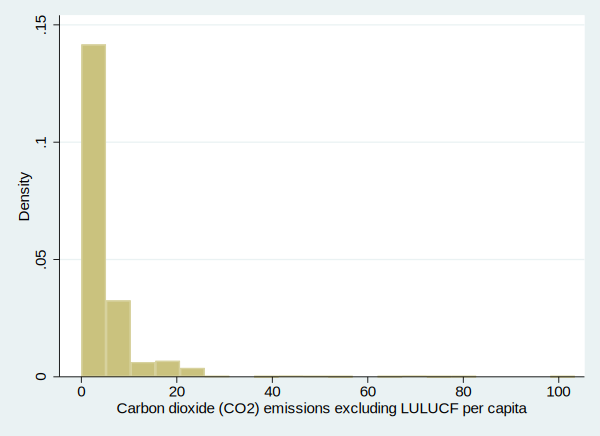



(bin=20, start=253.53072, width=11216.446)


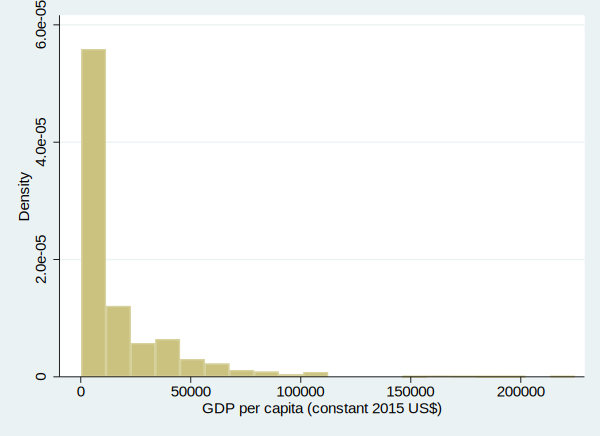



(bin=20, start=11.482, width=4.4259)


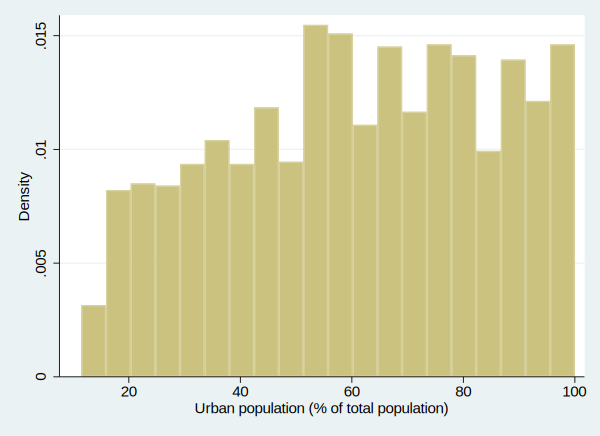



(bin=20, start=2.027, width=818843.4)


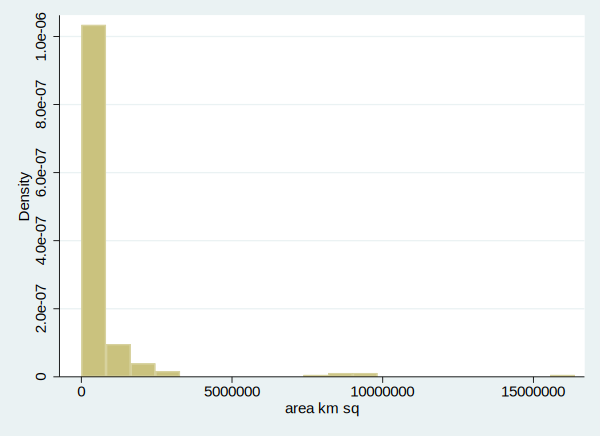



command histrogram is unrecognized


r(199);
r(199);


In [105]:
histogram co2pc, bin(20)
histogram gdppc, bin(20)
histogram urbper, bin(20)
histogram area, bin(20)
histrogram area_avg, bin(20)

In [106]:
*log transforming variables
foreach x of varlist area_avg area-urbper {
    gen ln`x' = ln(`x'+1)
    }


(11 missing values generated)
(233 missing values generated)
(154 missing values generated)
(108 missing values generated)
(22 missing values generated)



(bin=20, start=0, width=.23239782)


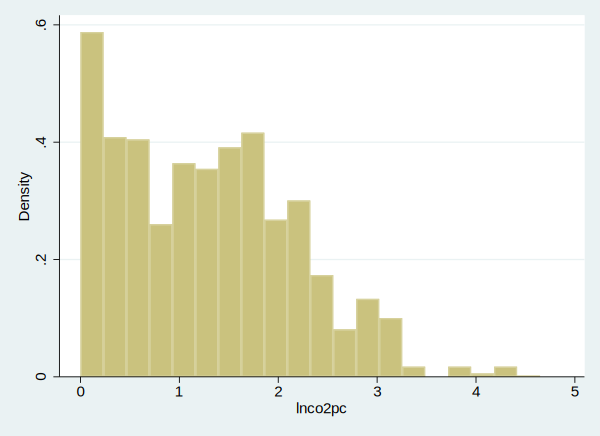



(bin=20, start=5.5394216, width=.33912904)


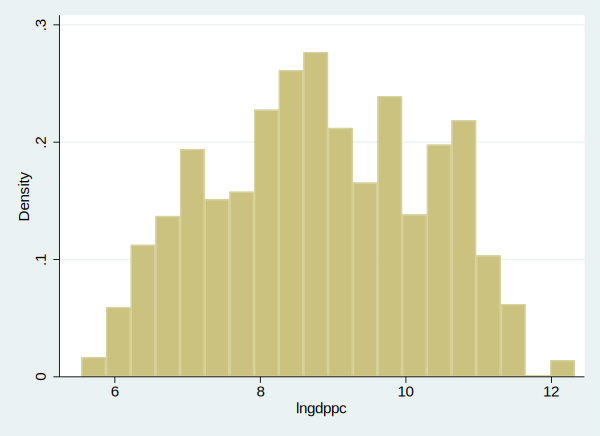



(bin=20, start=2.5242877, width=.10454164)


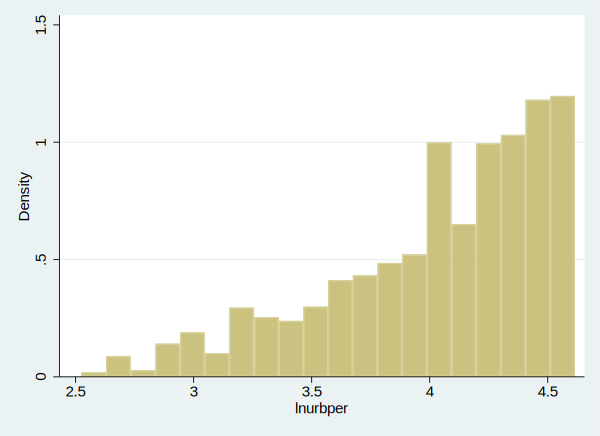



(bin=20, start=1.111331, width=.77500253)


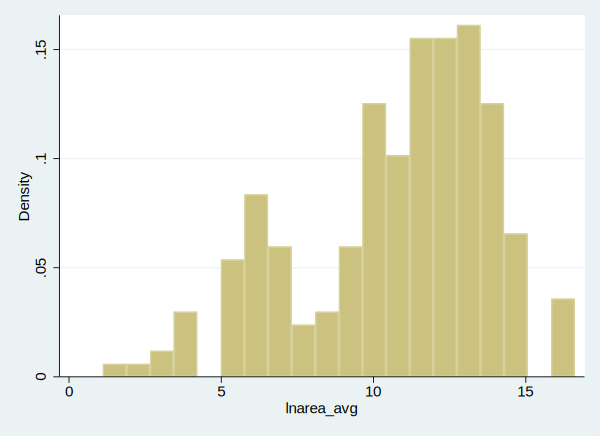

In [107]:
histogram lnco2pc, bin(20)
histogram lngdppc, bin(20)
histogram lnurbper, bin(20)
histogram lnarea_avg, bin(20)

### Random effects model
In Stata, you can use the xtreg command to estimate random effects model.

```xtreg depvar indepvar, vce(robust)```

In [121]:
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial, mle
estimates store random



Fitting constant-only model:
Iteration 0:   log likelihood =  1685.2841
Iteration 1:   log likelihood =  1687.1503
Iteration 2:   log likelihood =   1687.164

Fitting full model:
Iteration 0:   log likelihood =  1717.4134
Iteration 1:   log likelihood =   1789.189
Iteration 2:   log likelihood =  1825.8463
Iteration 3:   log likelihood =  1827.6349
Iteration 4:   log likelihood =  1827.6422

Random-effects ML regression                    Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

Random effects u_i ~ Gaussian                   Obs per group:
                                                              min =          1
                                                              avg =       10.9
                                                              max =         11

                                                LR chi2(4)        =     280.96
Log likelihood  =  1827.6422                    Prob > chi2     

In [116]:
*mle stands for maximum likelihood esimation and vce is to use robust standard errors
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial, vce(robust)


Random-effects GLS regression                   Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

R-sq:                                           Obs per group:
     within  = 0.0706                                         min =          1
     between = 0.5715                                         avg =       10.9
     overall = 0.5720                                         max =         11

                                                Wald chi2(4)      =     200.67
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                              (Std. Err. adjusted for 198 clusters in country)
------------------------------------------------------------------------------
             |               Robust
     lnco2pc |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lngdppc |   .2421874   

### my answer below
Our sample include 198 countries over 10 years. Since we did a random effects model, our results are generalized to the whole sample. Countries are being compared to all other countries and times. The results report a positive significant relationship between CO2 per capita and GDP per capita. Meaning as a country's GDP per capita increases there is a corresponding significant increase in CO2 emission per capita. The percent of urban population has a significant positive relationship with CO2 emission per capita. Additionally, we see that larger countries have significantly greater carbon dioxide emissions per capita. Finally, we see countries with a history of being colonializer have greater CO2 emissions.

```/sigma_u``` is the standard deviation of the random intercept. ```/sigma_e``` is the standard deviation of all the observations residuals. We see that the there is a more variation between countries as compared to within countries.

```rho``` is the intraclass coefficient

$ICC = \frac{(\sigma_j)^2}{(\sigma_j)^2+(\sigma_{ij})^2} * 100 \%$

In [110]:
di .5593655^2/(.5593655^2+.07271549^2)

.98338177


98.34% of the variation of the carbon dioxide emission per capita is explained by country-level variation. That's huge!

### Between effects model
In Stata, you can use the xtreg command with "be" to estimate between effects model.

In [122]:
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial, be
estimate store between



Between regression (regression on group means)  Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

R-sq:                                           Obs per group:
     within  = 0.0691                                         min =          1
     between = 0.6172                                         avg =       10.9
     overall = 0.6149                                         max =         11

                                                F(4,193)          =      77.79
sd(u_i + avg(e_i.))=  .5601026                  Prob > F          =     0.0000

------------------------------------------------------------------------------
     lnco2pc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lngdppc |   .4884859    .043167    11.32   0.000     .4033462    .5736256
    lnurbper |   .1045884    .117869     0.89   0.376    -.1278

### my answer below
Remember these results only report the population mean BETWEEN countries only. GDP per capita, % Urban, and land area stay the same. Our colonializer variable loses its significant. 

Important notes, the sample of the between-effects model is 198.

### Fixed effects model
In Stata, you can use the xtreg command with "fe" to estimate fixed effects model.

In [123]:
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial, fe
estimates store fixed


note: lnarea_avg omitted because of collinearity
note: 1.colonial omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

R-sq:                                           Obs per group:
     within  = 0.0707                                         min =          1
     between = 0.5432                                         avg =       10.9
     overall = 0.5438                                         max =         11

                                                F(2,1957)         =      74.44
corr(u_i, Xb)  = 0.4847                         Prob > F          =     0.0000

------------------------------------------------------------------------------
     lnco2pc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lngdppc |   .1913367   .0178775    10.7

In [118]:
xtreg lnco2pc lngdppc lnurbper lnarea_avg i.colonial, fe vce(robust)

note: lnarea_avg omitted because of collinearity
note: 1.colonial omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =      2,157
Group variable: country                         Number of groups  =        198

R-sq:                                           Obs per group:
     within  = 0.0707                                         min =          1
     between = 0.5432                                         avg =       10.9
     overall = 0.5438                                         max =         11

                                                F(2,197)          =       8.62
corr(u_i, Xb)  = 0.4847                         Prob > F          =     0.0003

                              (Std. Err. adjusted for 198 clusters in country)
------------------------------------------------------------------------------
             |               Robust
     lnco2pc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------

### my answer
The Fixed effects model reports only within-country effects. That means only countries are compared within themselves over time. GDP per capita stay the same as before. Urban percent loses significance. Notice that the time-invariant variables of area and colonializer are omitted? They do not vary within country!

<b> Note, you cannot general fixed effects to the general population, it is cluster specific. </b>

In [127]:
estimates table random between fixed,  b(%7.3f) se(%7.3f) p(%4.3f)


--------------------------------------------------
    Variable |  random      between      fixed    
-------------+------------------------------------
lnco2pc      |
     lngdppc |     0.235                          
             |     0.017                          
             |     0.000                          
    lnurbper |     0.231                          
             |     0.056                          
             |     0.000                          
  lnarea_avg |     0.047                          
             |     0.016                          
             |     0.003                          
             |
    colonial |
          1  |     0.352                          
             |     0.111                          
             |     0.002                          
             |
       _cons |    -2.304                          
             |     0.296                          
             |     0.000                          
-------------+-------

### Let's compare the estimates across models:

| model type | Random effects | Between effects | Within effects (fixed effects)|
| --- | --- | --- | --- |
| paramters | est (SE) | est (SE) | est (SE) |
| intercept | -2.304 (0.296)*** | -4.412 (0.428)*** | n/a |
| GDP per capita | 0.235 (0.017)*** | 0.488 (0.043)*** | 0.191 (0.018)*** |
| Urban (%) | 0.231 (0.056)*** | 0.105 (0.118) | 0.158 (0.063)* |
| Land mass | 0.047 (0.016)** | 0.090 (0.016)*** | n/a |  
| Colonializer | 0.352 (0.111)** | -0.013 (0.111) | n/a |

Because random effects uses both between-effects and within-effects. Random effect coefficients are between the estimates of between-effects and within-effects.

You should always make your decision of what model to use based on theory and previous research. But there is a **Hausman test** that can statistically assess which model is best for your data.

## Practice

The previous example was just for us to practice reshaping data. 

Now, we will open data that is already in long format. This is a dataset is mothers giving birth beween 1990 to 1998. This is subset from Abrevaya 2006 data published in the Journal of Applied Econometrics Data Archive. Here are main variables:

* momid: mother identifier
* birwt: birthweight (in grams)
* smoke: dummy variable for mother smoking during pregnancy
* male: dummy variable for sex of baby
* mage: mother's age at birth (in yrs)
* hsgrad: dummy variable of mom's grad HS
* somecoll: dummy variable of mom's having some college or more
* collgrad: dummy variable of mom's graduate college
* (omitted): reference catgory where mom's did not graduate HS
* married: dummy variable of married
* black: dummy variable for racial identity Black person
* kessner2: Kessner index=2 is of adequate prenatal care
* kessner3: Kessner index=3 is of adequate prenatal care
* omitted: Kessner index=1 is of adequate prenatal care (ref category)
* novisit: dummy variable no prenatal care visit
* pretri2: dummy variable fo first prenatal care visit in 2nd trimester
* pretri3: dummy variable fo first prenatal care visit in 3rd trimester
* omitted: ref cat of first prenatal care visit in 1st trimester

* Pick 3 independent variables (make sure to include at least 1 time-invariant variable) to assess the dep var: birwt.
* Run a random, between, and fixed effects models. Compare your results.

In [132]:
*Let's run the data 
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
desc




Contains data from https://www.stata-press.com/data/mlmus4/smoking.dta
  obs:         8,604                          
 vars:            24                          21 Jul 2007 11:49
 size:       825,984                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
momid           float   %9.0g                 
idx             float   %9.0g                 
stateres        float   %9.0g      state      
mage            float   %9.0g                 
meduc           float   %9.0g                 
mplbir          float   %9.0g      state      
nlbnl           float   %9.0g                 
gestat          float   %9.0g                 
birwt           float   %9.0g                 
cigs            float   %9.0g                 
smoke           float   %9.0g     

In [134]:
list in 1/5


     +-------------------------------------------------------------------------+
  1. | momid | idx | stateres | mage | meduc | mplbir | nlbnl | gestat | birwt |
     |    14 |   1 |       AL |   16 |    10 |     VA |     0 |     24 |  2790 |
     |-------+-----------------------------------------------------------------|
     | cigs  |     smoke  |   male  | year  | married  |  hsgrad  |  somecoll  |
     |    0  | Nonsmoker  | Female  |    0  |       0  |       0  |         0  |
     |-------------------------------------------------------------------------|
     | collgrad | magesq | black | kessner2  | kessner3  | novisit  | pretri2  |
     |        0 |    256 | Black |        0  |        1  |       0  |       0  |
     |-------------------------------------------------------------------------|
     |                                 pretri3                                 |
     |                                       1                                 |
     +---------------------